In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random


In [2]:
cities = ["Agra","Kanpur","Udaipur","Jaipur","Gurugram","Noida","Delhi","Lucknow","Prayagraj","Ahemdabad","Mumbai","Pune","Barelly","Chennai","Bengaluru","Kolkata","Hyedrabad","Varanasi","Jodhpur","Chandigarh","Surat","Shimla","Shilong","Srinagar","Dehradun","Bhopal","Nagpur","Gantok","Puducherry","Thiruvananthapuram","Vadodara","Jhasi","Ajmer","Bikaner","Mysuru","Kochi","Madurai","Thane","Indore","Visakhspatnam","Patna","Ghaziabad","Ludhiana","Nashik","Faridabad","Meerut","Rajkot","Dhanbad","Ranchi","Gwalior"]
data = []
for _ in range(1225):
    origin = random.choice(cities)
    destination = random.choice([city for city in cities if city != origin])
    time = round(random.uniform(1,10),2)
    distance = round(time * random.uniform(50,100),2)
    data.append([origin, destination, time, distance])

In [3]:
data = pd.DataFrame(data, columns=["Origin","Destination","Time(H)","Distance(km)"])

In [4]:
output = "D:/Google Map T and D_1225.xlsx"

In [5]:
data.to_excel(output, index=False)

In [6]:
output

'D:/Google Map T and D_1225.xlsx'

In [7]:
data.head()

,Origin,Destination,Time(H),Distance(km)
0,Faridabad,Kanpur,4.50,252.17
1,Jhasi,Kolkata,2.67,192.25
2,Kanpur,Faridabad,9.74,860.04
3,Pune,Bikaner,3.91,308.41
4,Hyedrabad,Ludhiana,9.51,664.02


In [9]:
data.isnull().sum() 

Origin          0
Destination     0
Time(H)         0
Distance(km)    0
dtype: int64

In [12]:
# Checking the number of rows and columns  
num_rows, num_columns = data.shape  
print(f"Number of rows: {num_rows} (Total number of cities)\nNumber of columns: {num_columns} (Given Features)")  

Number of rows: 1225 (Total number of cities)
Number of columns: 4 (Given Features)


In [13]:
#let, Time as x
#let, Distance as y

beta_1,beta_0 = np.polyfit(data["Time(H)"],data["Distance(km)"],1)
beta_1

74.62999900431647

In [14]:
beta_0

0.7432920470761021

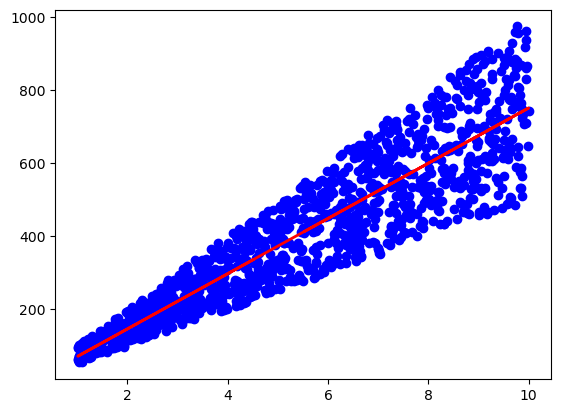

In [15]:
plt.scatter(data["Time(H)"],data["Distance(km)"],color="blue")
plt.plot(data["Time(H)"],-4.9 + 75.57 * data["Time(H)"],color="red",linestyle="-",linewidth=2)
plt.show()

In [16]:
data["Predicted_Distance"] = beta_0 + beta_1 * data["Time(H)"]
data["Error"] = data["Distance(km)"] - data["Predicted_Distance"]
data["Rel_Error"] = data["Error"] / data["Distance(km)"]
data["abs"] = data["Rel_Error"].abs()
data.head()

,Origin,Destination,Time(H),Distance(km),Predicted_Distance,Error,Rel_Error,abs
0,Faridabad,Kanpur,4.50,252.17,336.578288,-84.408288,-0.334728,0.334728
1,Jhasi,Kolkata,2.67,192.25,200.005389,-7.755389,-0.040340,0.040340
2,Kanpur,Faridabad,9.74,860.04,727.639482,132.400518,0.153947,0.153947
3,Pune,Bikaner,3.91,308.41,292.546588,15.863412,0.051436,0.051436
4,Hyedrabad,Ludhiana,9.51,664.02,710.474583,-46.454583,-0.069960,0.069960


In [17]:
MAPE = data["abs"].mean() * 100
MAPE

17.427068887296013

In [18]:
m = data["Distance(km)"].mean()
m

408.1030693877551

In [19]:
data['diff'] = data["Distance(km)"] - m
data['diff_sq'] = data['diff']*data['diff']
data['diff1'] = data["Distance(km)"] - data['Predicted_Distance']
data['diff1_sq'] = data['diff1'] * data['diff1']
data.head()

,Origin,Destination,Time(H),Distance(km),Predicted_Distance,Error,Rel_Error,abs,diff,diff_sq,diff1,diff1_sq
0,Faridabad,Kanpur,4.50,252.17,336.578288,-84.408288,-0.334728,0.334728,-155.933069,24315.122129,-84.408288,7124.759010
1,Jhasi,Kolkata,2.67,192.25,200.005389,-7.755389,-0.040340,0.040340,-215.853069,46592.547564,-7.755389,60.146065
2,Kanpur,Faridabad,9.74,860.04,727.639482,132.400518,0.153947,0.153947,451.936931,204246.989251,132.400518,17529.897074
3,Pune,Bikaner,3.91,308.41,292.546588,15.863412,0.051436,0.051436,-99.693069,9938.708084,15.863412,251.647835
4,Hyedrabad,Ludhiana,9.51,664.02,710.474583,-46.454583,-0.069960,0.069960,255.916931,65493.475374,-46.454583,2158.028243


In [20]:
s1 = data['diff_sq'].sum()
s1

53957482.2620591

In [21]:
s2 = data['diff1_sq'].sum()
s2

9037322.947117133

In [22]:
R2 = 1 - (s2/s1)
R2

0.8325102920253964

# This indicates that 83.25% of the variance in the dependent variable is explained by the model.


In [23]:
# CAR Case Study

import pandas as pd
import numpy as np
df=pd.read_csv("D:/cars_data_clean_CASE.csv")
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'D:/cars_data_clean_CASE.csv'

In [ ]:
df

In [ ]:
#let, listed_price as x
#let, km as y

beta_1,beta_0 = np.polyfit(df["listed_price"],df["km"],1)
beta_1

In [ ]:
beta_0

In [ ]:
plt.scatter(df["listed_price"],df["km"],color="blue")
plt.plot(df["listed_price"],-293 + 75.57 * df["listed_price"],color="red",linestyle="-",linewidth=2)
plt.show()

In [ ]:
df["Predicted_km"] = beta_0 + beta_1 * df["listed_price"]
df["error"] = df["km"] - df["Predicted_km"]
df["rel_Error"] = df["error"] / df["km"]
df["Abs"] = df["rel_Error"].abs()
df.head()

In [ ]:
Mape = df["Abs"].mean() * 100
Mape

In [ ]:
Mean = df["km"].mean()
Mean

In [ ]:
df['diff'] = df["km"] - Mean
df['diff_sq'] = df['diff'] * df['diff']
df['diff1'] = df["km"] - df['Predicted_km']
df['diff1_sq'] = df['diff1'] * df['diff1']
df.head()

In [ ]:
S1 = df['diff_sq'].sum()
S1

In [ ]:
S2 = df['diff1_sq'].sum()
S2

In [ ]:
R_2 = 1 - (S2/S1)
R_2

In [ ]:
ad_r2 = 1 - (((1 - R_2)*(26428-1)) / (26428 - 1 - 1))
ad_r2

In [ ]:
=IF(D2=D2|D9/D3|D4|D24,negative),IF(D2=D23|D38|D35|D51|D58|D8|D59|D22|D44,positive,negative)